# MATH 210 Introduction to Mathematical Computing

## March 17, 2017

1. Differential equations with scipy.integrate.ode.int

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Solving differential equations

A differenntial equation is an equation envolving an unknown function $y(t)$ and its derivatives $y'(t), y''(t)...$

For example, $y(t) = \sin(t)$ is a solution to the second order differental equation $y'' + y = 0$.

The order of a differential equation is the highest order derivative of the unknown funciton $y$ which appears in the equation.

$y' + 2y = t$ is a first order and $y''+2y'-y=e^t$ is a second order.

A differential equation is linear if it only involves $y$ and its derivatives on their own.
For example, $y''' + 3y'' = \sin(t)$ is a linear equaiton but $y'+y^2 =0$ is nonlinear.
$y''+\sin(y)=0$ is also nonlinear.

Solving nonlinear differentail equations explicitly is usually impossible but we can always approximate solutions numerically.

### odeint

The main ODE solver in SciPy is `scipy.integrate.odeint`.

In [2]:
import scipy.integrate as spi

In [3]:
spi.odeint?

We see that `odeint` takes 3 positional arguments `func`, `y0` and `t` where `func`  describes the left side of a first order differential equation $y=f(y,t)$, `y0` are the intial conditions and t is an array of t values where we want to approximate $y(t)$.

### Example: $y'=y, y(0)=1$

We know the solution is $y(t)=e^t$. Let's use `odeint` to solve the equation and compare the true solution. 

In [8]:
# function describing right side of y'=f(y,t)
# in this case, f(y,t) = y
def f(y,t):
    return y

In [5]:
# intial condition y(0)=1
y0 = 1

In [6]:
# array of t values where we want y(t)
# the first t value must be t=0, corresponding to the intial condition y(0)=1
t = np.linspace(0,2,100)

In [9]:
y = spi.odeint(f,y0,t)

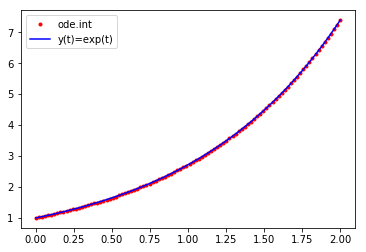

In [15]:
# compare with true solution y(t)=e^t
Y = np.exp(t)
plt.plot(t,y,'r.',t,Y,'b'), plt.legend(['ode.int', 'y(t)=exp(t)']);

## Example: $y' = \sin(y)$, $y(0)=1$

It is possible to solve this equation explicitly: can you solve $\int \frac{1}{sin(t)} dt$?

In [49]:
from sympy import Symbol, sin

In [50]:
y = Symbol('y')

In [51]:
f = 1/sin(y)

In [52]:
from sympy.integrals import integrate

In [53]:
integrate(f,y)

log(cos(y) - 1)/2 - log(cos(y) + 1)/2

In [54]:
def f(y,t):
    return np.sin(y)

In [55]:
y0 = 1

In [56]:
t = np.linspace(0,10,100)

In [57]:
y = spi.odeint(f,y0,t)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


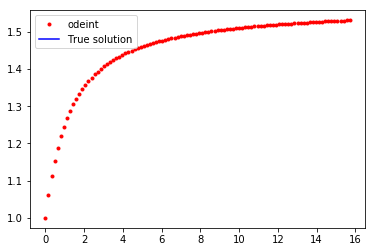

In [67]:
Y = np.log(np.cos(y) - 1)/2 - np.log(np.cos(y) + 1)/2
plt.plot(t,y,'r.',t,Y,'b'); plt.legend(['odeint', 'True solution']);

### Example: $y'=\sin(y)+\cos(2y)$, $y(0)=1$

In [62]:
def f(y,t):
    return np.sin(y)+np.cos(2*y)

In [48]:
y0 = 1

In [63]:
t = np.linspace(0,5*np.pi,100)

In [64]:
y = spi.odeint(f,y0,t)

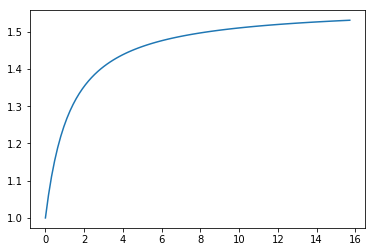

In [66]:
plt.plot(t,y);